# Feature Selection for Regression Data
> I recently developed a model to predict ship roll damping using Linear Regression. I spend quite much time doing the feature selection, here I want to revisit this but using a synthetic regression dataset.

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [machine learning, feature selection]
- image: images/deterministic_seakeeping_fig9.jpg
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

I took the inspiration from this post: [feature-selection-for-regression-data](https://machinelearningmastery.com/feature-selection-for-regression-data/).

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import altair as alt

## generate regression dataset
scikit-learn library has a function *make_regression* which generates a synthetic regression dataset. 

Here is a dataset with 5 features but where only 2 contain any information that influences the result (y).

In [40]:
X, y, coefarray = make_regression(n_samples=200, n_features=5, n_informative=2, noise=0, random_state=1, coef=True)
columns = ['x%s' % key for key in range(X.shape[1])]
data = pd.DataFrame(data=X, columns=columns)
data['y']=y

In [41]:
alt.Chart(data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),

).properties(
    width=100,
    height=150
).repeat(
    row=['y'],
    column=columns,
).interactive()

alt.RepeatChart(...)

Note that the data looks like it has some noise when plotted in this way eventhough it hasn't. Here is the coefficients of the model that generated this data:

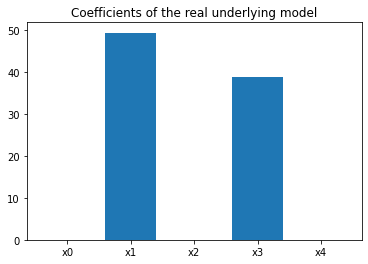

In [38]:
fig,ax=plt.subplots()
ax.bar(x=columns,height=coefarray);
ax.set_title('Coefficients of the real underlying model');

And if we fit a LinearRegression to this data, we get the same coefficients:

In [35]:
model=LinearRegression()
model.fit(X=X,y=y);

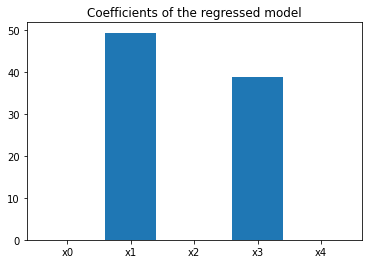

In [37]:
fig,ax=plt.subplots()
ax.bar(x=columns,height=model.coef_);
ax.set_title('Coefficients of the regressed model');

And the goodness of fit is 1, so we have no noise and a perfect model.

In [42]:
model.score(X=X, y=y)

1.0